<a href="https://colab.research.google.com/github/madaam99/CoffeeRegression/blob/main/CoffeeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ihelon/coffee-sales")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'coffee-sales' dataset.
Path to dataset files: /kaggle/input/coffee-sales


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
data = pd.read_csv(path + "/index_1.csv")
data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [4]:
data['cash_type'].value_counts()

,count
cash_type,
card,3547
cash,89


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money        3636 non-null   float64
 5   coffee_name  3636 non-null   object 
dtypes: float64(1), object(5)
memory usage: 170.6+ KB


In [6]:
data.describe()

,money
count,3636.000000
mean,31.746859
std,4.919926
min,18.120000
25%,27.920000
50%,32.820000
75%,35.760000
max,40.000000


In [7]:
data['coffee_name'].value_counts()

,count
coffee_name,
Americano with Milk,824
Latte,782
Americano,578
Cappuccino,501
Cortado,292
Hot Chocolate,282
Cocoa,243
Espresso,134


In [8]:
data["coffee_name"] = data['coffee_name'].apply(lambda x: x.title())
data['coffee_name'].value_counts()

,count
coffee_name,
Americano With Milk,824
Latte,782
Americano,578
Cappuccino,501
Cortado,292
Hot Chocolate,282
Cocoa,243
Espresso,134


###EDA

In [9]:
coffeeByCard = data.groupby(["card", "coffee_name"]).size().reset_index(name="count").sort_values(by="count", ascending=False)
coffeeByCard

,card,coffee_name,count
220,ANON-0000-0000-0141,Cortado,99
418,ANON-0000-0000-0276,Americano With Milk,63
23,ANON-0000-0000-0012,Americano,48
731,ANON-0000-0000-0507,Latte,40
1577,ANON-0000-0000-1163,Americano,38
...,...,...,...
11,ANON-0000-0000-0006,Hot Chocolate,1
12,ANON-0000-0000-0007,Americano With Milk,1
13,ANON-0000-0000-0008,Americano With Milk,1
14,ANON-0000-0000-0008,Cocoa,1


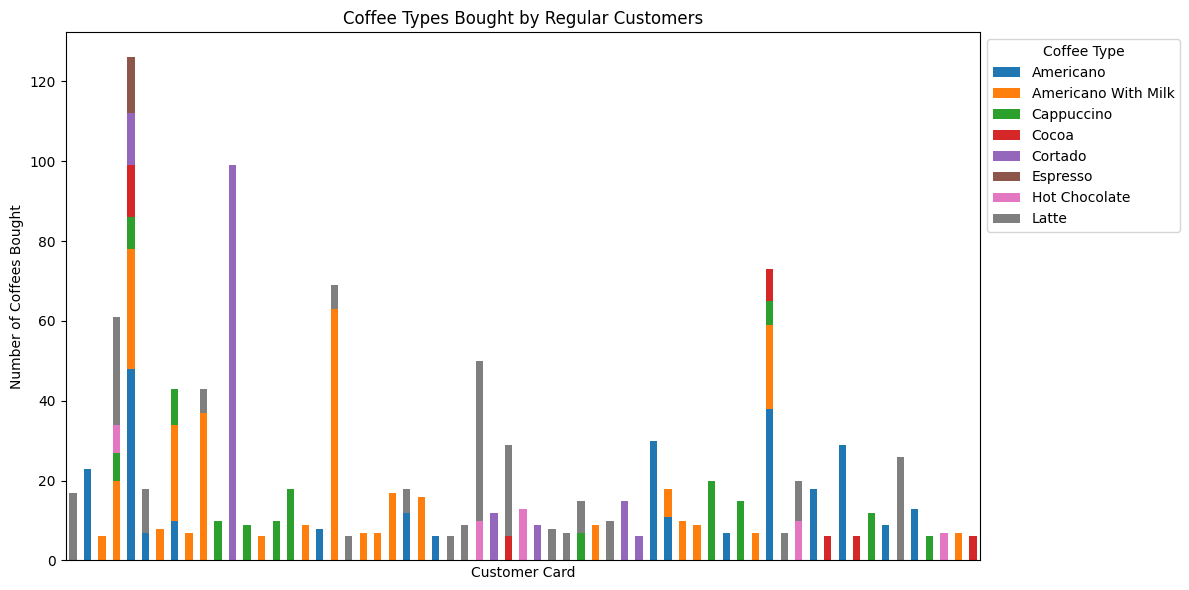

In [10]:
regularCustomer = coffeeByCard.loc[coffeeByCard["count"] > 5]

regularCustomer.pivot(index="card", columns="coffee_name", values="count").plot(kind="bar", stacked=True, figsize=(12, 6))
plt.xlabel("Customer Card")
plt.ylabel("Number of Coffees Bought")
plt.title("Coffee Types Bought by Regular Customers")
plt.xticks([])
plt.legend(title="Coffee Type", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

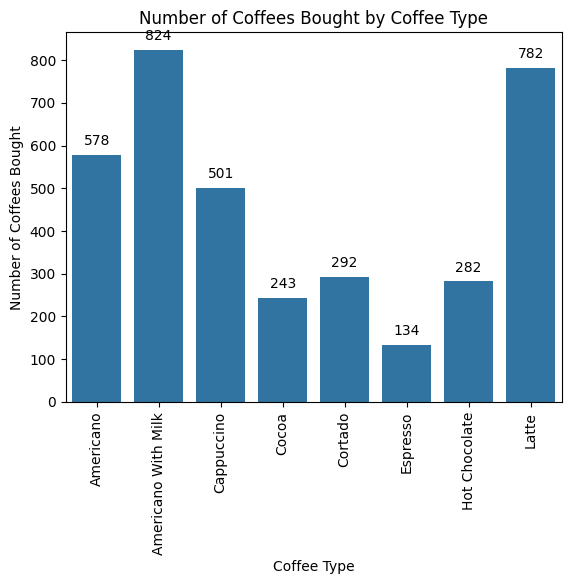

In [11]:
coffeeCount = data.groupby("coffee_name").size().reset_index(name="count")
coffeeCount = coffeeCount.loc[coffeeCount["count"] > 5]
coffeeCount

ax = sns.barplot(x=coffeeCount["coffee_name"], y=coffeeCount["count"])
plt.xticks(rotation=90)
plt.xlabel("Coffee Type")
plt.ylabel("Number of Coffees Bought")
plt.title("Number of Coffees Bought by Coffee Type")
for container in ax.containers:
    plt.bar_label(container, padding=5)
plt.show()

Finding the formats of columns "datetime"

In [12]:
import re

def normalize_numbers(val):
  return re.sub(r'\d+', 'NUM', val)

In [13]:
temp = data.copy()
temp["datetime"] = temp["datetime"].apply(normalize_numbers)
temp["datetime"].unique()

array(['NUM-NUM-NUM NUM:NUM:NUM.NUM'], dtype=object)

Applying the findings to extract new features for EDA

In [14]:
timeData = data.copy()

timeData['date'] = pd.to_datetime(timeData['date'])
timeData["datetime"] = timeData["datetime"].apply(lambda x: x.split(".")[0])
timeData['datetime'] = pd.to_datetime(timeData['datetime'], format='%Y-%m-%d %H:%M:%S')

timeData["Month"] = timeData["date"].dt.month
timeData["Day"] = timeData["date"].dt.day
timeData["Hour"] = timeData["datetime"].dt.hour
timeData["Year_Month"] = timeData["date"].dt.to_period("M")
timeData["Week"] = timeData["date"].dt.to_period("W")
timeData

,date,datetime,cash_type,card,money,coffee_name,Month,Day,Hour,Year_Month,Week
0,2024-03-01,2024-03-01 10:15:50,card,ANON-0000-0000-0001,38.70,Latte,3,1,10,2024-03,2024-02-26/2024-03-03
1,2024-03-01,2024-03-01 12:19:22,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,12,2024-03,2024-02-26/2024-03-03
2,2024-03-01,2024-03-01 12:20:18,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,12,2024-03,2024-02-26/2024-03-03
3,2024-03-01,2024-03-01 13:46:33,card,ANON-0000-0000-0003,28.90,Americano,3,1,13,2024-03,2024-02-26/2024-03-03
4,2024-03-01,2024-03-01 13:48:14,card,ANON-0000-0000-0004,38.70,Latte,3,1,13,2024-03,2024-02-26/2024-03-03
...,...,...,...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54,card,ANON-0000-0000-1158,35.76,Cappuccino,3,23,10,2025-03,2025-03-17/2025-03-23
3632,2025-03-23,2025-03-23 14:43:37,card,ANON-0000-0000-1315,35.76,Cocoa,3,23,14,2025-03,2025-03-17/2025-03-23
3633,2025-03-23,2025-03-23 14:44:16,card,ANON-0000-0000-1315,35.76,Cocoa,3,23,14,2025-03,2025-03-17/2025-03-23
3634,2025-03-23,2025-03-23 15:47:28,card,ANON-0000-0000-1316,25.96,Americano,3,23,15,2025-03,2025-03-17/2025-03-23


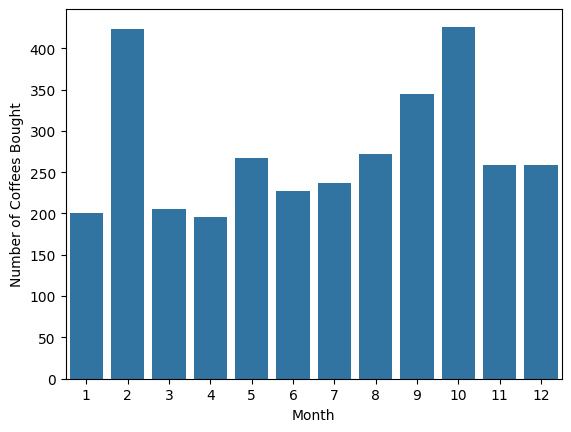

In [15]:
#Extracting dates for one year's time to reduce biased results
timeDataAll = timeData.copy()
timeData = timeData.loc[(timeData["date"] >= "2024-03-01") & (timeData["date"] < "2025-03-01")]

dataByMonth = timeData.groupby("Month").agg({"money": ["sum", "count"]}).reset_index()
sns.barplot(x="Month", y=("money", "count"), data=dataByMonth)
plt.xlabel("Month")
plt.ylabel("Number of Coffees Bought")
plt.show()

Quick visualization of customer behaviour across vendor machine 1

In [16]:
ven1 = data.copy()

ven1['date'] = pd.to_datetime(ven1['date'])
ven1["datetime"] = ven1["datetime"].apply(lambda x: x.split(".")[0])
ven1['datetime'] = pd.to_datetime(ven1['datetime'], format='%Y-%m-%d %H:%M:%S')

ven1["Month"] = ven1["date"].dt.month
ven1["Day"] = ven1["date"].dt.day
ven1["Hour"] = ven1["datetime"].dt.hour
ven1["Minute"] = ven1["datetime"].dt.minute
ven1

,date,datetime,cash_type,card,money,coffee_name,Month,Day,Hour,Minute
0,2024-03-01,2024-03-01 10:15:50,card,ANON-0000-0000-0001,38.70,Latte,3,1,10,15
1,2024-03-01,2024-03-01 12:19:22,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,12,19
2,2024-03-01,2024-03-01 12:20:18,card,ANON-0000-0000-0002,38.70,Hot Chocolate,3,1,12,20
3,2024-03-01,2024-03-01 13:46:33,card,ANON-0000-0000-0003,28.90,Americano,3,1,13,46
4,2024-03-01,2024-03-01 13:48:14,card,ANON-0000-0000-0004,38.70,Latte,3,1,13,48
...,...,...,...,...,...,...,...,...,...,...
3631,2025-03-23,2025-03-23 10:34:54,card,ANON-0000-0000-1158,35.76,Cappuccino,3,23,10,34
3632,2025-03-23,2025-03-23 14:43:37,card,ANON-0000-0000-1315,35.76,Cocoa,3,23,14,43
3633,2025-03-23,2025-03-23 14:44:16,card,ANON-0000-0000-1315,35.76,Cocoa,3,23,14,44
3634,2025-03-23,2025-03-23 15:47:28,card,ANON-0000-0000-1316,25.96,Americano,3,23,15,47


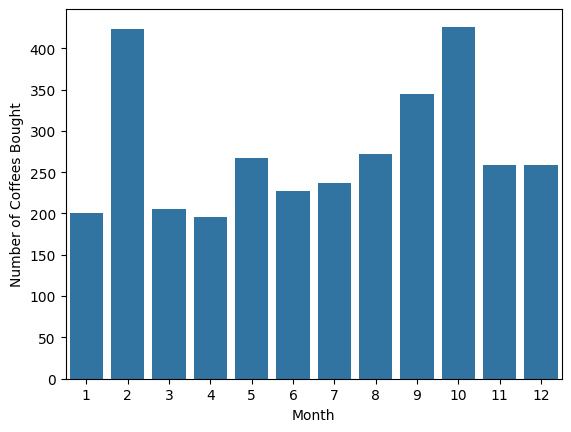

In [17]:
ven1 = ven1.loc[(ven1["date"] >= "2024-03-01") & (ven1["date"] < "2025-03-01")]

ven1MonthGroup = ven1.groupby("Month").size().reset_index(name="count")
sns.barplot(x="Month", y="count", data=ven1MonthGroup)
plt.xlabel("Month")
plt.ylabel("Number of Coffees Bought")
plt.show()

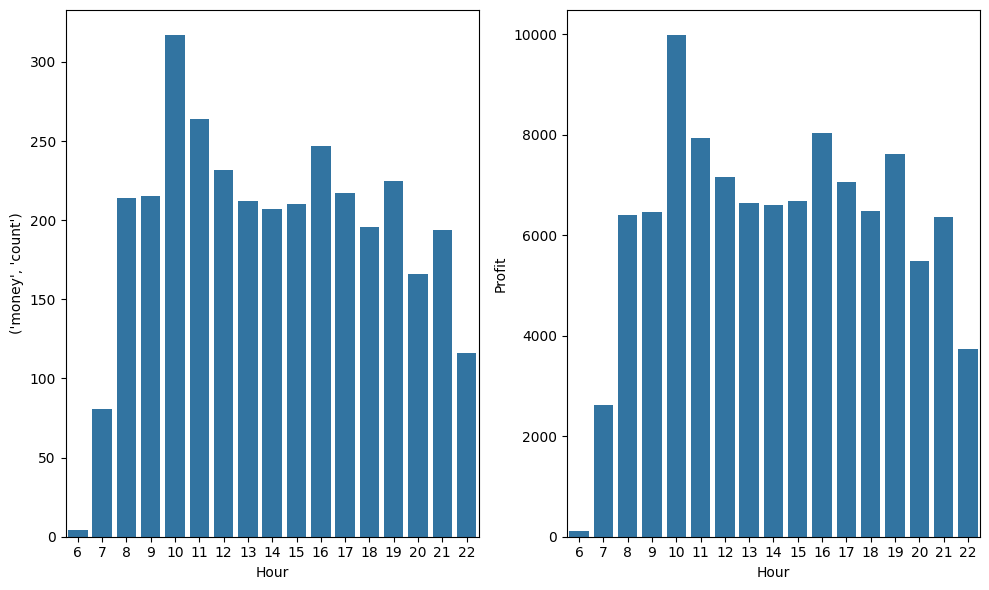

In [18]:
dataByHour = timeData.groupby("Hour").agg({"money": ["sum", "count"]}).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(x="Hour", y=("money", "count"), data=dataByHour, ax=ax[0])
plt.xlabel("Hour")
plt.ylabel("Number of Coffees Bought")
sns.barplot(x="Hour", y=("money", "sum"), data=dataByHour, ax=ax[1])
plt.xlabel("Hour")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

In [19]:
profitByMonth = timeData.groupby("Year_Month")["money"].sum().reset_index()
profitByMonth

,Year_Month,money
0,2024-03,7050.20
1,2024-04,6720.56
2,2024-05,9063.42
3,2024-06,7758.76
4,2024-07,6915.94
5,2024-08,7613.84
6,2024-09,9988.64
7,2024-10,13891.16
8,2024-11,8590.54
9,2024-12,8237.74


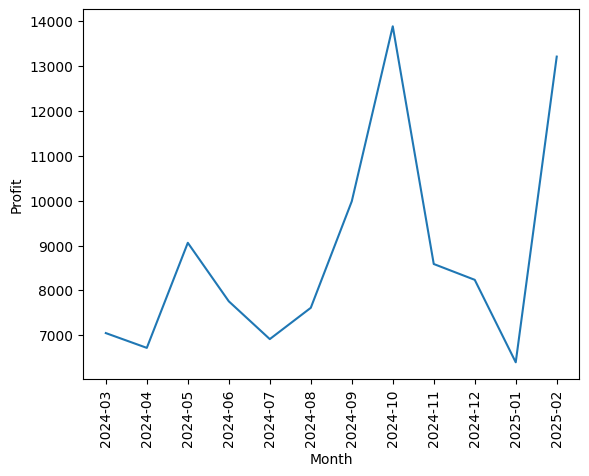

In [20]:
# Convert Year_Month to string for plotting
profitByMonth['Year_Month'] = profitByMonth['Year_Month'].astype(str)

ax = sns.lineplot(x="Year_Month", y="money", data=profitByMonth)
plt.xlabel("Month")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.show()

In [21]:
dataByWeek = timeData.groupby("Week").agg({"money": ["sum", "count"]}).reset_index()
dataByWeek.head()

Week   money      
                             sum count
0  2024-02-26/2024-03-03   973.5    28
1  2024-03-04/2024-03-10  1840.5    53
2  2024-03-11/2024-03-17  1516.3    47
3  2024-03-18/2024-03-24  1307.8    38
4  2024-03-25/2024-03-31  1412.1    40

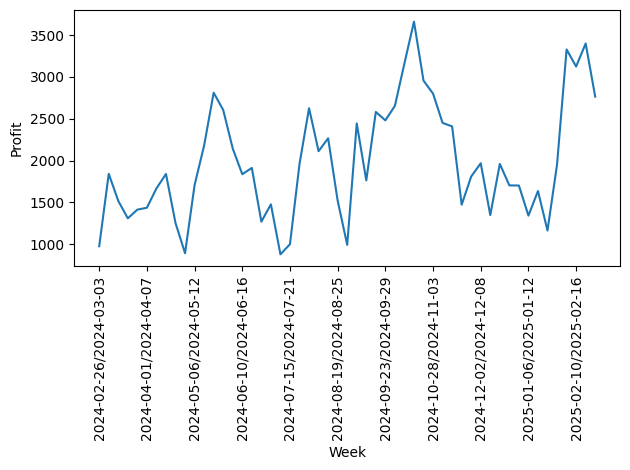

In [22]:
dataByWeek['Week'] = dataByWeek['Week'].astype(str)

# Access the 'sum' of 'money' using the MultiIndex
sns.lineplot(x="Week", y=('money', 'sum'), data=dataByWeek)
plt.xlabel("Week")
plt.ylabel("Profit")

n_weeks = len(dataByWeek['Week'])
tick_interval = n_weeks // 10
plt.xticks(range(0, n_weeks, tick_interval), dataByWeek['Week'][::tick_interval], rotation=90)

plt.tight_layout()
plt.show()

In [23]:
allWeek = timeDataAll.groupby(["Week"]).agg({"money": ["sum", "count"]}).reset_index()
allWeek.head()

Week   money      
                             sum count
0  2024-02-26/2024-03-03   973.5    28
1  2024-03-04/2024-03-10  1840.5    53
2  2024-03-11/2024-03-17  1516.3    47
3  2024-03-18/2024-03-24  1307.8    38
4  2024-03-25/2024-03-31  1412.1    40

/tmp/ipython-input-2647933994.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="Week", y=('money', 'sum'), data=allWeek, palette="Set2")


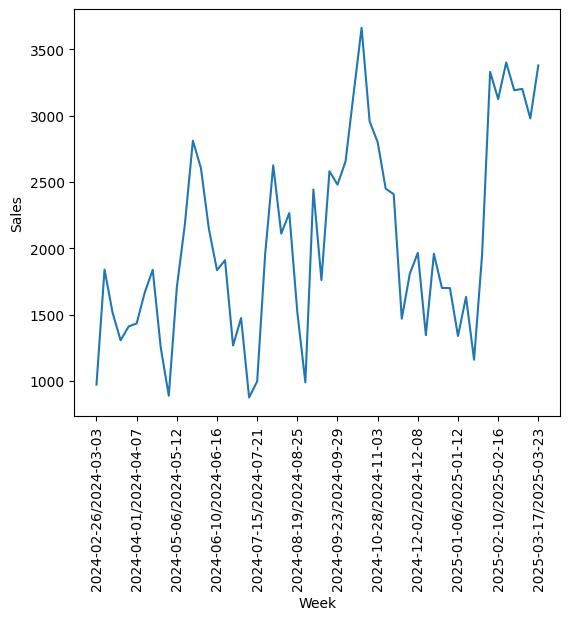

In [24]:
allWeek['Week'] = allWeek['Week'].astype(str)

sns.lineplot(x="Week", y=('money', 'sum'), data=allWeek, palette="Set2")
plt.xlabel("Week")
plt.ylabel("Sales")
plt.tight_layout()

n_weeks = len(allWeek['Week'])
tick_interval = n_weeks // 10
plt.xticks(range(0, n_weeks, tick_interval), allWeek['Week'][::tick_interval], rotation=90)
plt.show()

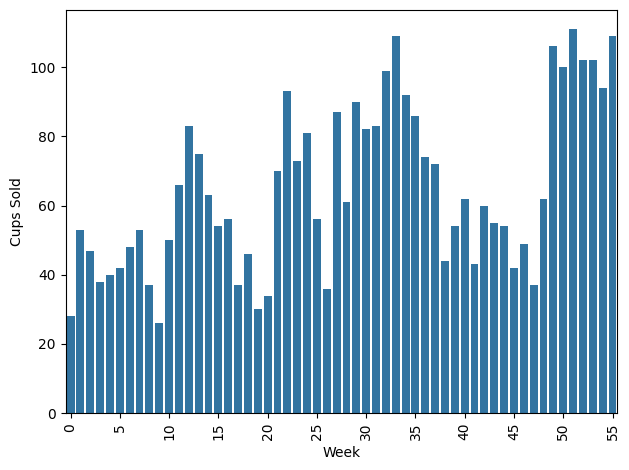

In [25]:
sns.barplot(x="Week", y=('money', 'count'), data=allWeek)
plt.xlabel("Week")
plt.ylabel("Cups Sold")

n_weeks = len(allWeek.index)
tick_interval = n_weeks // 10
plt.xticks(range(0, n_weeks, tick_interval), allWeek.index[::tick_interval], rotation=90)

plt.tight_layout()
plt.show()

In [26]:
allMonth = timeDataAll.groupby(["Year_Month"]).agg({"money": ["sum", "count"]}).reset_index()
allMonth.head()

Year_Month    money      
                  sum count
0    2024-03  7050.20   206
1    2024-04  6720.56   196
2    2024-05  9063.42   267
3    2024-06  7758.76   227
4    2024-07  6915.94   237

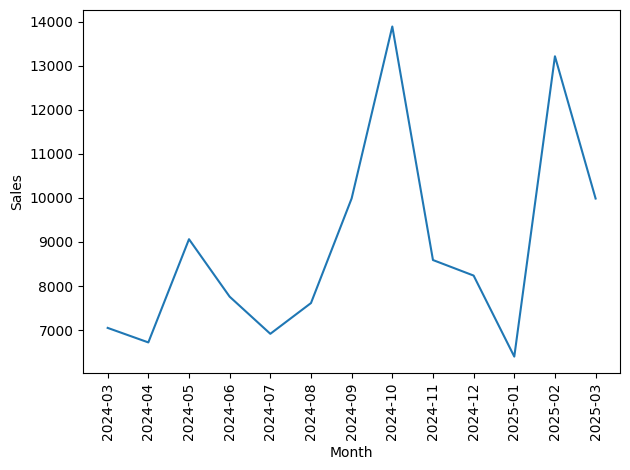

In [27]:
allMonth['Year_Month'] = allMonth['Year_Month'].astype(str)

sns.lineplot(x="Year_Month", y=('money', 'sum'), data=allMonth)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

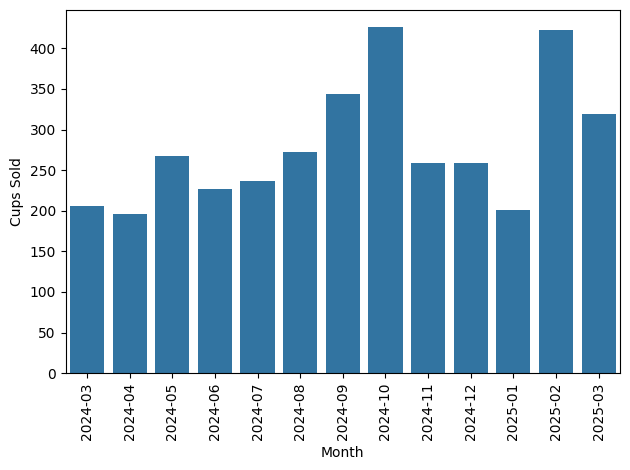

In [28]:
sns.barplot(x="Year_Month", y=('money', 'count'), data=allMonth)
plt.xlabel("Month")
plt.ylabel("Cups Sold")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [29]:
timeRange = pd.date_range(start=timeDataAll['date'].min(), end=timeDataAll["date"].max())
timeDf = pd.DataFrame(timeRange, columns=["date"])

allDay = timeDataAll.groupby(["date"]).agg({"money": ["sum", "count"]}).reset_index()
allDay.columns = ["date", "money", "cups"]
allDayDf = pd.merge(allDay, timeDf, on="date", how="right")
allDayDf = allDayDf.fillna(0)
allDayDf.head()

,date,money,cups
0,2024-03-01,396.3,11.0
1,2024-03-02,228.1,7.0
2,2024-03-03,349.1,10.0
3,2024-03-04,135.2,4.0
4,2024-03-05,338.5,9.0


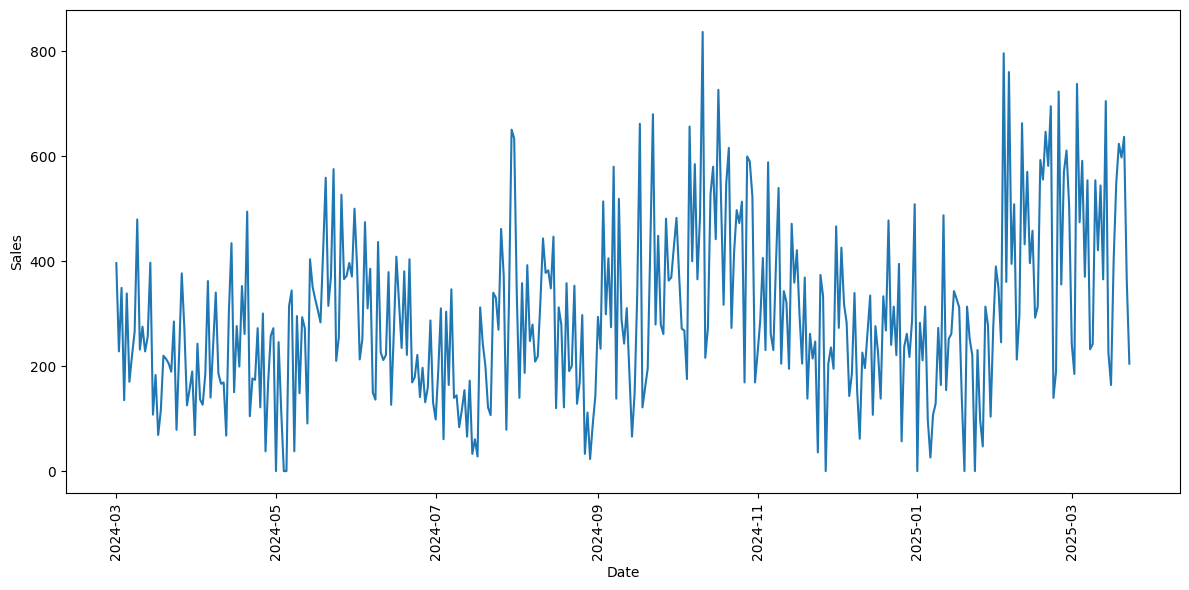

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(x="date", y="money", data=allDayDf)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [31]:
timeDataAll['time'] = timeDataAll['datetime'].dt.floor('15min').dt.time
allHour = timeDataAll.groupby("time").agg({"money": ["count"]}).reset_index()
allHour.columns = ["time", "count"]

# Find the earliest time with data
start_dt = timeDataAll['time'].min()
end_dt = timeDataAll['time'].max()

# Create a full range of time intervals using datetime objects and then extract the time
all_intervals = pd.DataFrame(
    np.unique(pd.date_range(
        start=pd.to_datetime(start_dt.strftime('%H:%M:%S')),
        end=pd.to_datetime('23:45:00'),
        freq='15min'
    ).time), columns=['time']
)

allHourDf = pd.merge(all_intervals, allHour, on='time', how='left').fillna(0)
allHourDf.head()

,time,count
0,06:45:00,5.0
1,07:00:00,10.0
2,07:15:00,7.0
3,07:30:00,21.0
4,07:45:00,53.0


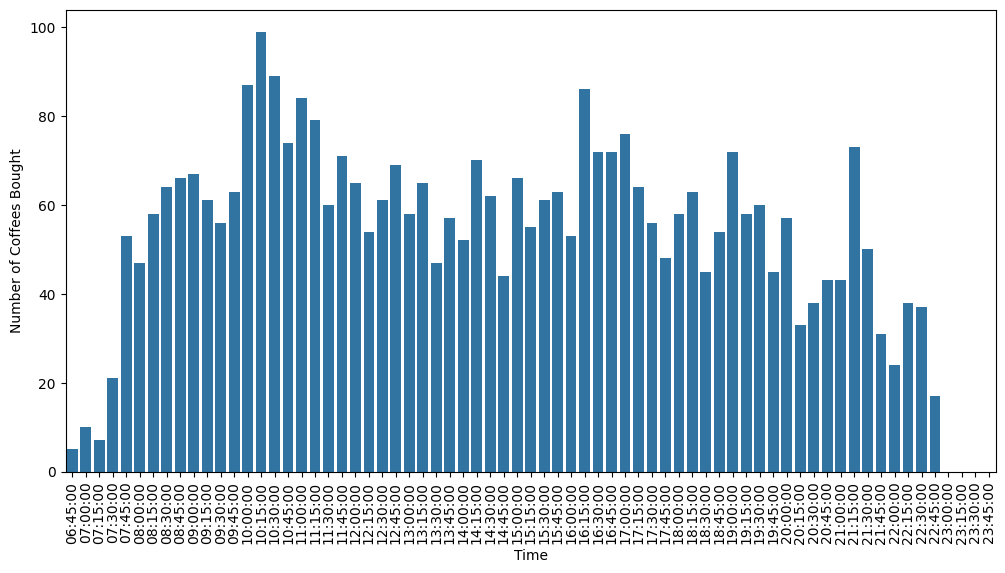

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(x="time", y="count", data=allHourDf)
plt.xlabel("Time")
plt.ylabel("Number of Coffees Bought")
plt.xticks(rotation=90)
plt.show()

###Modelling

In [33]:
!pip install statsforecast utilsforecast MLForecast

In [34]:
from statsmodels.tsa.arima.model import ARIMA

from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from mlforecast import MLForecast
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import *

from sklearn.linear_model import LinearRegression
import lightgbm as lgb

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
df = data.copy()

In [36]:
df = df.groupby("date").size().reset_index(name="cups")
df

,date,cups
0,2024-03-01,11
1,2024-03-02,7
2,2024-03-03,10
3,2024-03-04,4
4,2024-03-05,9
...,...,...
376,2025-03-19,21
377,2025-03-20,20
378,2025-03-21,20
379,2025-03-22,12


In [37]:
# Filling in missing dates for continuous data
df['date'] = pd.to_datetime(df['date'])

dateRange = pd.date_range(start=df["date"].min(), end=df["date"].max())
dateDf = pd.DataFrame(dateRange, columns=["date"])
df = pd.merge(dateDf, df, on="date", how="left").fillna(0)
df['cups'] = df['cups'].astype(int)
df

,date,cups
0,2024-03-01,11
1,2024-03-02,7
2,2024-03-03,10
3,2024-03-04,4
4,2024-03-05,9
...,...,...
383,2025-03-19,21
384,2025-03-20,20
385,2025-03-21,20
386,2025-03-22,12


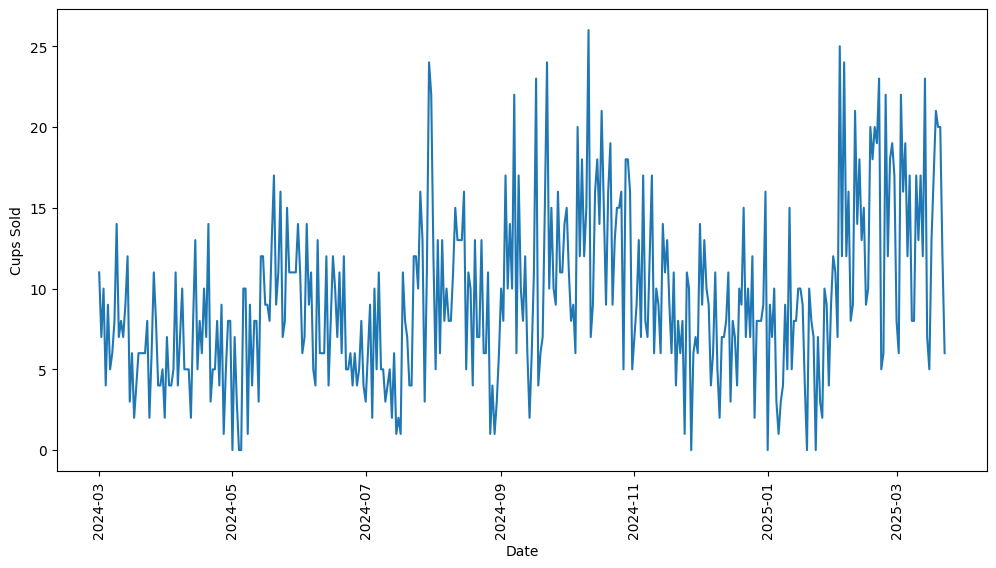

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="cups")
plt.xlabel("Date")
plt.ylabel("Cups Sold")
plt.xticks(rotation=90)
plt.show()

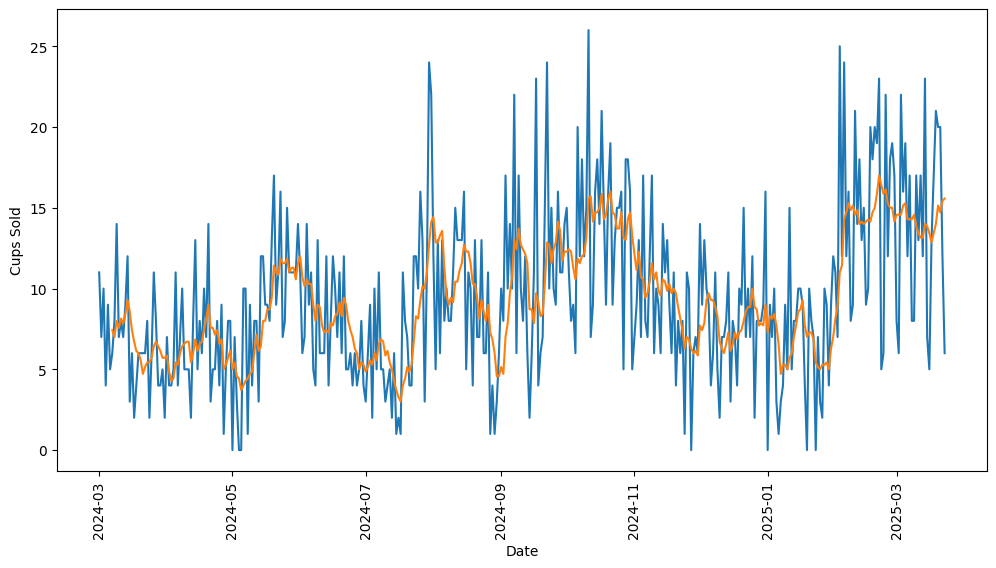

In [39]:
movingAverage = df.copy()
movingAverage["moving_average"] = movingAverage["cups"].rolling(window=7).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=movingAverage, x="date", y="cups")
sns.lineplot(data=movingAverage, x="date", y="moving_average")
plt.xlabel("Date")
plt.ylabel("Cups Sold")
plt.xticks(rotation=90)
plt.show()

In [40]:
timeStep = df.copy()

timeStep["steps"] = np.arange(len(timeStep["date"]))
timeStep

,date,cups,steps
0,2024-03-01,11,0
1,2024-03-02,7,1
2,2024-03-03,10,2
3,2024-03-04,4,3
4,2024-03-05,9,4
...,...,...,...
383,2025-03-19,21,383
384,2025-03-20,20,384
385,2025-03-21,20,385
386,2025-03-22,12,386


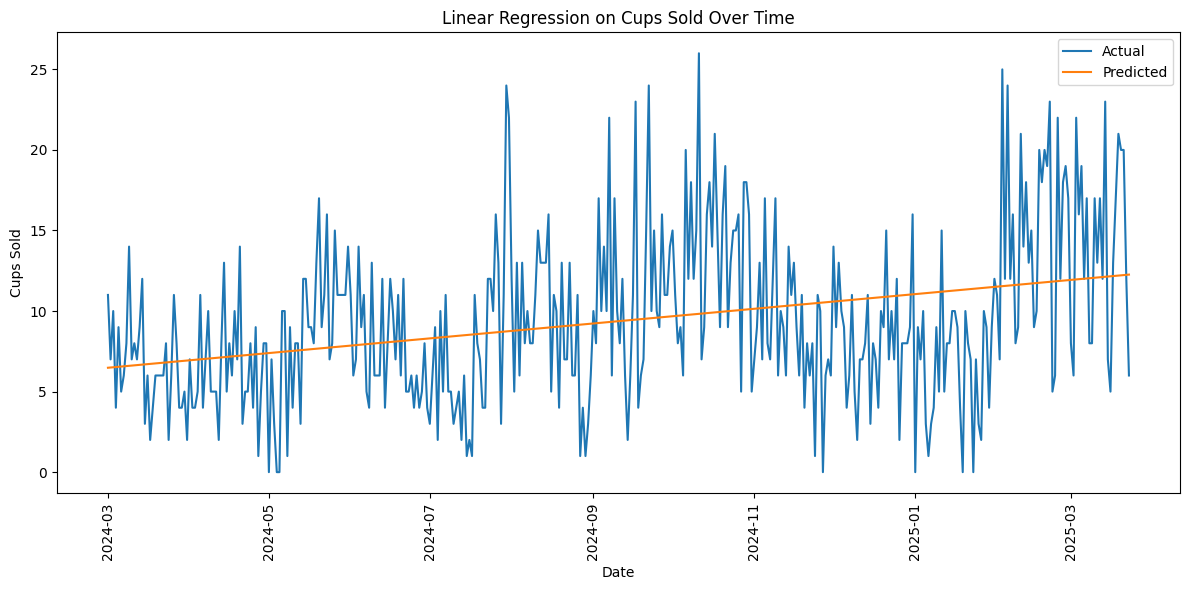

In [41]:
X = timeStep["steps"].values.reshape(-1, 1)
y = timeStep['cups']

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X).flatten(), index=timeStep.index)

plt.figure(figsize=(12, 6))
plt.plot(timeStep["date"], timeStep["cups"], label="Actual")
plt.plot(timeStep["date"], y_pred, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Cups Sold")
plt.title("Linear Regression on Cups Sold Over Time")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [42]:
test = df.tail(7)
train = df.drop(test.index).reset_index(drop=True)
train

,date,cups
0,2024-03-01,11
1,2024-03-02,7
2,2024-03-03,10
3,2024-03-04,4
4,2024-03-05,9
...,...,...
376,2025-03-12,17
377,2025-03-13,12
378,2025-03-14,23
379,2025-03-15,7


In [43]:
arima = ARIMA(train["cups"], order=(5, 0, 5))
arima_fit = arima.fit()
arima_fit.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   cups   No. Observations:                  381
Model:                 ARIMA(5, 0, 5)   Log Likelihood               -1102.667
Date:                Thu, 30 Oct 2025   AIC                           2229.334
Time:                        15:33:24   BIC                           2276.648
Sample:                             0   HQIC                          2248.106
                                - 381                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3202      1.185      7.863      0.000       6.997      11.643
ar.L1          0.7301      0.044     16.724      0.000       0.645       0.816
ar.L2          0.3950      0.056      7.030      0.000       0.285       0.505
ar.L3         -0.3703      0.058     -6.350      0.000      -0.485      -0.256
ar.L4         -0.7240      0.064    -11.340      0.000      -0.849      -0.599
ar.L5          0.8728      0.044     19.846      0.000       0.787       0.959
ma.L1         -0.6173      0.057    -10.826      0.000      -0.729      -0.506
ma.L2         -0.3652      0.037     -9.935      0.000      -0.437      -0.293
ma.L3          0.3564      0.043      8.331      0.000       0.273       0.440
ma.L4          0.8462      0.045     18.994      0.000       0.759       0.933
ma.L5         -0.7475      0.059    -12.673      0.000      -0.863      -0.632
sigma2        18.9252      1.327     14.264      0.000      16.325      21.526
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                19.61
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                             0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
arima_pred = arima_fit.predict(start=len(train), end=len(df)-1)
arima_pred

,predicted_mean
381,10.872484
382,12.451159
383,13.532842
384,13.158163
385,11.982517
386,10.308152
387,9.354710


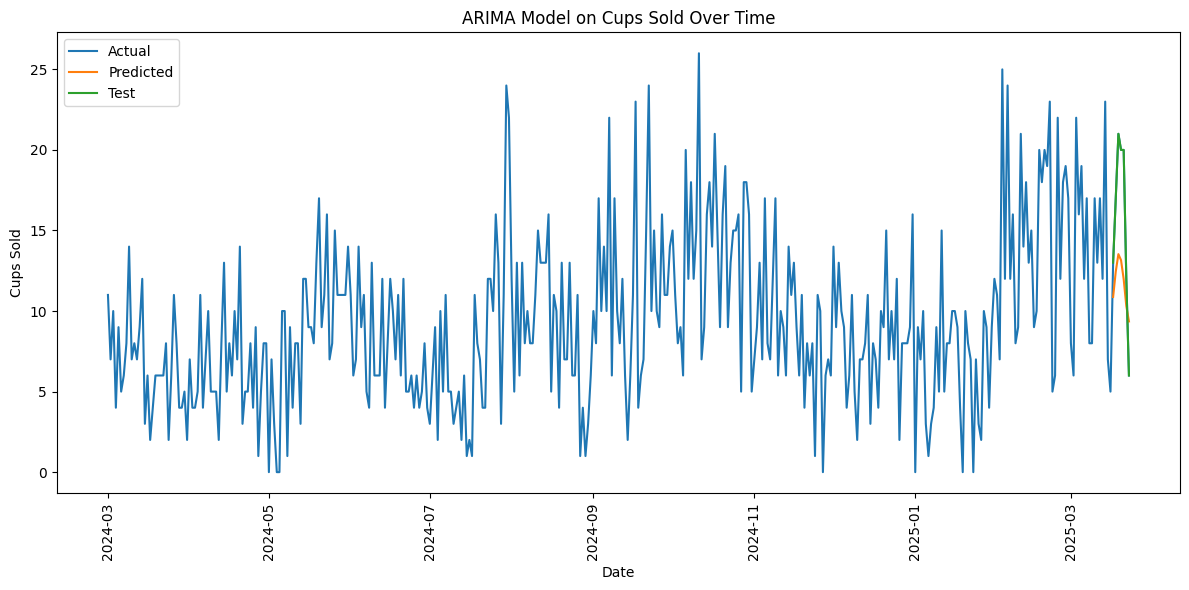

In [45]:
arima_pred_df = arima_pred.reset_index(name="cups")
arima_pred_df["date"] = test["date"].reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="date", y="cups", label="Actual")
sns.lineplot(data=arima_pred_df, x="date", y="cups", label="Predicted")
sns.lineplot(data=test, x="date", y="cups", label="Test")
plt.xlabel("Date")
plt.ylabel("Cups Sold")
plt.title("ARIMA Model on Cups Sold Over Time")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [46]:
arimaMAE = mean_absolute_error(test["cups"], arima_pred)
arimaR2 = r2_score(test["cups"], arima_pred)

print(f"ARIMA MAE: {arimaMAE}")
print(f"ARIMA R2: {arimaR2}")

ARIMA MAE: 4.864199023571616
ARIMA R2: -0.134659933029337


In [47]:
models = [
    AutoARIMA(seasonal=False, alias="arima"),
    AutoARIMA(season_length=7, alias="arima_7"),
    AutoARIMA(season_length=90, alias="arima_90"),
]

sf = StatsForecast(models=models, freq="D")

train['unique_id'] = 'coffee_sales'

sf.fit(df=train, time_col="date", target_col="cups")

y_sf = sf.predict(h=len(test))

eval_df = pd.merge(y_sf, test, on="date", how="left")
eval = evaluate(eval_df, time_col="date", target_col="cups", metrics=[mae])
eval

,unique_id,metric,arima,arima_7,arima_90
0,coffee_sales,mae,5.053029,4.389337,5.053029


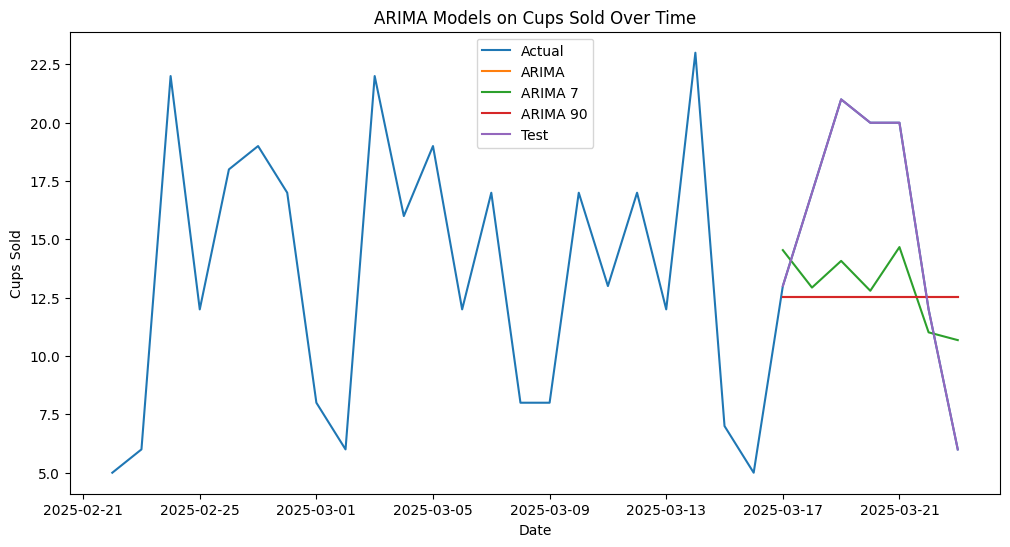

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[-30:], x="date", y="cups", label="Actual")
sns.lineplot(data=y_sf, x="date", y="arima", label="ARIMA")
sns.lineplot(data=y_sf, x="date", y="arima_7", label="ARIMA 7")
sns.lineplot(data=y_sf, x="date", y="arima_90", label="ARIMA 90")
sns.lineplot(data=test, x="date", y="cups", label="Test")
plt.xlabel("Date")
plt.ylabel("Cups Sold")
plt.title("ARIMA Models on Cups Sold Over Time")
plt.legend()
plt.show()

In [49]:
models = [
    LinearRegression(),
    lgb.LGBMRegressor(),
]

fcst = MLForecast(models=models, freq="D", lags=[1, 5, 7])
fcst.fit(df=train, time_col="date", target_col="cups")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000036 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 374, number of used features: 3
[LightGBM] [Info] Start training from score 9.291444
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

MLForecast(models=[LinearRegression, LGBMRegressor], freq=D, lag_features=['lag1', 'lag5', 'lag7'], date_features=[], num_threads=1)

In [50]:
ml_predictions = fcst.predict(h=len(test))
ml_predictions

,unique_id,date,LinearRegression,LGBMRegressor
0,coffee_sales,2025-03-17,11.475155,11.645191
1,coffee_sales,2025-03-18,11.054157,16.185850
2,coffee_sales,2025-03-19,13.658781,14.662125
3,coffee_sales,2025-03-20,10.457878,9.792431
4,coffee_sales,2025-03-21,12.011236,11.992781
5,coffee_sales,2025-03-22,9.703318,12.454782
6,coffee_sales,2025-03-23,8.713765,8.090741


In [51]:
ml_eval_df = pd.merge(ml_predictions, test, on="date", how="left")
ml_eval = evaluate(ml_eval_df, time_col="date", target_col="cups", metrics=[mae])
ml_eval

,unique_id,metric,LinearRegression,LGBMRegressor
0,coffee_sales,mae,5.336177,4.181021


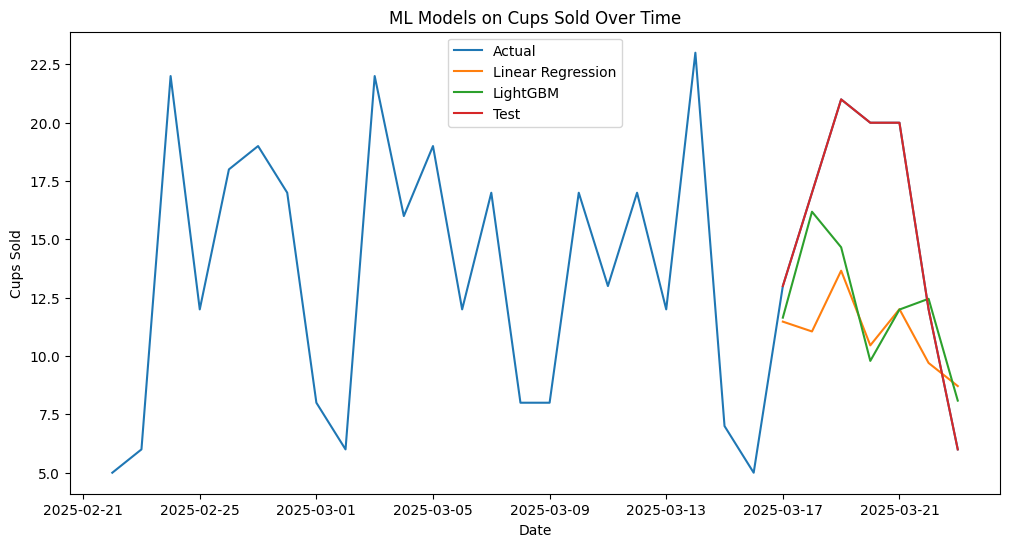

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[-30:], x="date", y="cups", label="Actual")
sns.lineplot(data=ml_predictions, x="date", y="LinearRegression", label="Linear Regression")
sns.lineplot(data=ml_predictions, x="date", y="LGBMRegressor", label="LightGBM")
sns.lineplot(data=test, x="date", y="cups", label="Test")
plt.xlabel("Date")
plt.ylabel("Cups Sold")
plt.title("ML Models on Cups Sold Over Time")
plt.legend()
plt.show()

In [53]:
mixed_eval = pd.merge(eval, ml_eval, on=["metric", "unique_id"])
mixed_eval

,unique_id,metric,arima,arima_7,arima_90,LinearRegression,LGBMRegressor
0,coffee_sales,mae,5.053029,4.389337,5.053029,5.336177,4.181021


In [54]:
X = timeStep["steps"].values.reshape(-1, 1)
y = timeStep['cups']

X_test = X[-7:]
y_test = y[-7:]
X = X[:-7]
y = y[:-7]

model = LinearRegression()
model.fit(X, y)

nn = Sequential([
    Dense(64, activation='relu', input_shape=(1,)),
    Dense(32, activation='relu'),
    Dense(1)
])

nn.compile(optimizer="adam", loss="mae")

history = nn.fit(X, y, epochs=100, batch_size=32, validation_split=0.1, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 5.0444 - val_loss: 4.8051
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8984 - val_loss: 4.7803
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.8159 - val_loss: 4.7482
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9763 - val_loss: 4.8107
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9531 - val_loss: 5.0489
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.5841 - val_loss: 5.6518
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0112 - val_loss: 4.8627
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0040 - val_loss: 4.8710
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.7150 - val_loss: 4.8490
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.6430 - val_loss: 4.8624
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.7865 - val_loss: 4.9950
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9792 - val_l

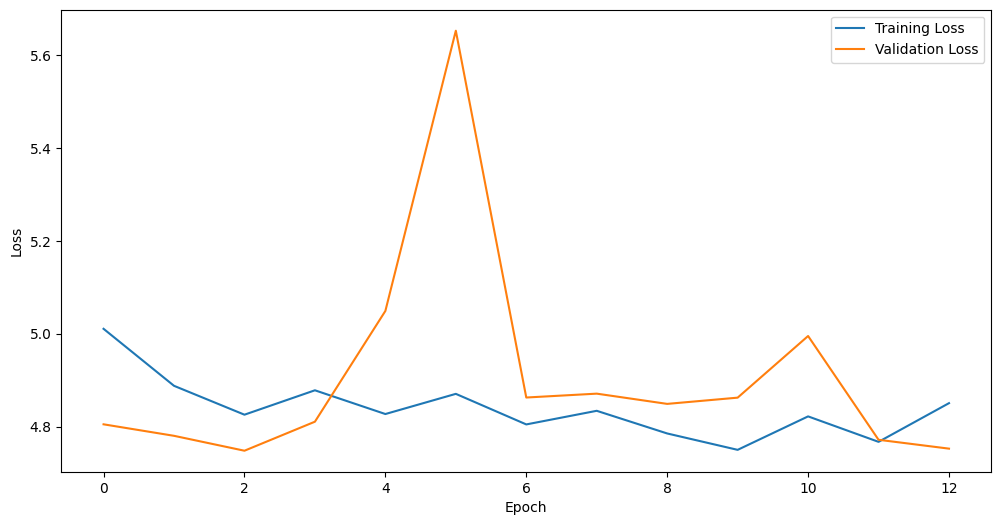

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [56]:
X_lstm = X.reshape(X.shape[0], 1, X.shape[1])

lstm = Sequential([
    LSTM(64, input_shape=(1, 1)),
    Dense(1)
])

lstm.compile(optimizer="adam", loss="mae")

history = lstm.fit(X_lstm, y, epochs=100, batch_size=32, validation_split=0.1, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 7.5970 - val_loss: 12.7426
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.5239 - val_loss: 11.9651
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.8540 - val_loss: 11.2701
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0319 - val_loss: 10.8018
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.7095 - val_loss: 10.3996
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4696 - val_loss: 9.9235
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.9323 - val_loss: 9.5851
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.9616 - val_loss: 8.9099
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.4327 - val_loss: 8.2139
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.2154 - val_loss: 7.1329
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8814 - val_loss: 6.7045
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.7641 - 

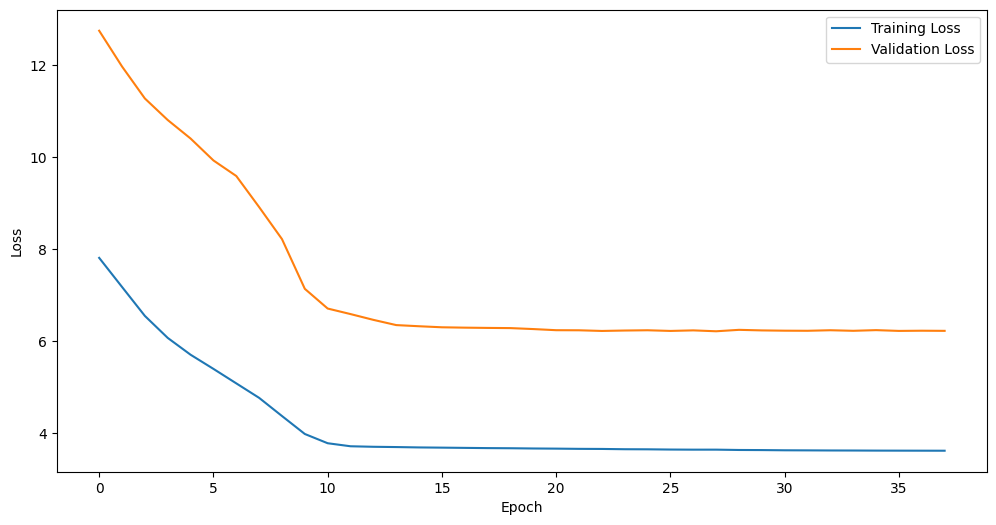

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [58]:
nn_pred = nn.predict(X_test)
nn_pred_df = pd.DataFrame(nn_pred, columns=["cups"])
nn_pred_df["date"] = test["date"].reset_index(drop=True)
display(nn_pred_df)

lstm_pred = lstm.predict(X_test)
lstm_pred_df = pd.DataFrame(lstm_pred, columns=["cups"])
lstm_pred_df["date"] = test["date"].reset_index(drop=True)
display(lstm_pred_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


,cups,date
0,16.466623,2025-03-17
1,16.509480,2025-03-18
2,16.552320,2025-03-19
3,16.595177,2025-03-20
4,16.638037,2025-03-21
5,16.680874,2025-03-22
6,16.723728,2025-03-23


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


,cups,date
0,9.048010,2025-03-17
1,9.048059,2025-03-18
2,9.048108,2025-03-19
3,9.048155,2025-03-20
4,9.048203,2025-03-21
5,9.048248,2025-03-22
6,9.048294,2025-03-23


In [59]:
# nn_pred_df['cups'] = nn_pred_df['cups'].round().astype(int)
# lstm_pred_df['cups'] = lstm_pred_df['cups'].round().astype(int)

# display(nn_pred_df)
# display(lstm_pred_df)

In [60]:
nn_pred_df = nn.predict(X_test)
nn_pred_df = pd.DataFrame(nn_pred_df, columns=["nn_pred"])
nn_pred_df["date"] = test["date"].reset_index(drop=True)
nn_pred_df["unique_id"] = "coffee_sales"

lstm_pred = lstm.predict(X_test)
lstm_pred_df = pd.DataFrame(lstm_pred, columns=["lstm_pred"])
lstm_pred_df["date"] = test["date"].reset_index(drop=True)
lstm_pred_df["unique_id"] = "coffee_sales"

nn_eval_df = pd.merge(nn_pred_df, test, on="date", how="left")
nn_eval = evaluate(nn_eval_df, time_col="date", target_col="cups", metrics=[mae], id_col="unique_id")

lstm_eval_df = pd.merge(lstm_pred_df, test, on="date", how="left")
lstm_eval = evaluate(lstm_eval_df, time_col="date", target_col="cups", metrics=[mae], id_col="unique_id")
lstm_eval

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


,unique_id,metric,lstm_pred
0,coffee_sales,mae,7.394216


In [61]:
nn_combined = pd.merge(nn_eval, lstm_eval, on=["metric", "unique_id"])
nn_combined

,unique_id,metric,nn_pred,lstm_pred
0,coffee_sales,mae,4.36803,7.394216


In [62]:
total_eval = pd.merge(mixed_eval, nn_combined, on=["metric", "unique_id"])
total_eval

,unique_id,metric,arima,arima_7,arima_90,LinearRegression,LGBMRegressor,nn_pred,lstm_pred
0,coffee_sales,mae,5.053029,4.389337,5.053029,5.336177,4.181021,4.36803,7.394216


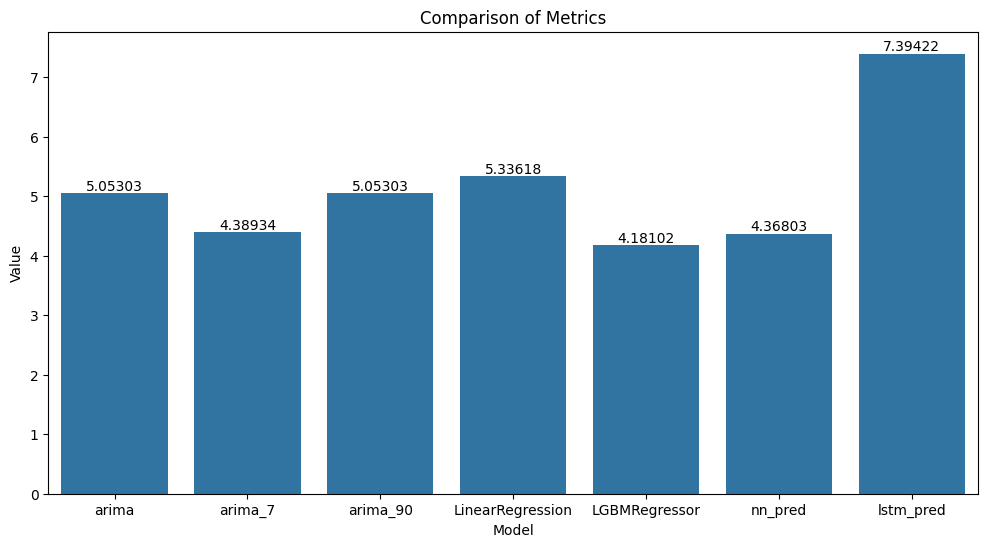

In [63]:
total_eval_melted = total_eval.melt(id_vars=["metric", "unique_id"], var_name="model", value_name="value")

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=total_eval_melted, x="model", y="value")
plt.xlabel("Model")
plt.ylabel("Value")
plt.title("Comparison of Metrics")
for container in ax.containers:
    ax.bar_label(container)
plt.show()